In [19]:
#Prepare Environment & Packages
from flask import Flask, render_template 
import pandas as pd
import requests
from bs4 import BeautifulSoup 
from io import BytesIO
import base64
import matplotlib.pyplot as plt

In [20]:
#Getting URL
url_get = requests.get('https://www.imdb.com/search/title/?release_date=2019-01-01,2019-12-31')

In [21]:
#Select the part to Scrap
soup = BeautifulSoup(url_get.content,"html.parser")
part = soup.find_all('div', attrs={'class':'lister-item-content'})

In [22]:
#Scrapping Title, Rating, Meta, Votes
temp = []
for i in range(0, len(part)):
    #Title
    judul = part[i].find('h3',attrs={'class':'lister-item-header'})
    judul = judul.find('a').text

    #SCORE
    rating = part[i].find('div', attrs={'class':'inline-block ratings-imdb-rating'})
    rating = rating.find('strong', attrs={'':''}).text
    
    #META
    if (part[i].find('span', attrs={'class':'metascore favorable'}) == None) :
        meta = 0
    else :
        meta = part[i].find('span', attrs={'class':'metascore favorable'}).text.strip()
        
    #VOTES
    votes = part[i].find('p', attrs={'class':'sort-num_votes-visible'})
    votes = votes.find('span', attrs={'name':'nv'}).text
    
    temp.append((judul,votes,meta,rating))

In [23]:
#Building Dataframe Object
imdb = pd.DataFrame(temp,columns=('Title','Vote','MetaScore','Rating'))
imdb.head()

,Title,Vote,MetaScore,Rating
0,Sex Education,"101,260",0,8.3
1,1917,"125,623",78,8.5
2,The Witcher,"206,546",0,8.4
3,Gisaengchung,"181,526",96,8.6
4,Once Upon a Time ...in Hollywood,"359,903",83,7.7


In [24]:
#Setting Title as Index
imdb_index = imdb.set_index('Title')

In [25]:
#Adjusting dtypes
imdb_index['Vote'] = imdb_index['Vote'].replace(to_replace = ',' , value = '', regex=True)
imdb_index['Vote'] = imdb_index['Vote'].astype('float64')
imdb_index['Rating'] = imdb_index['Rating'].astype('float64')
imdb_index['MetaScore'] = imdb_index['MetaScore'].astype('float64')
imdb_index.dtypes

Vote         float64
MetaScore    float64
Rating       float64
dtype: object

In [26]:
#Shortlisted top 7 by ImdbRating
top7 = imdb_index.sort_values(by= 'Rating',ascending=False).head(7)
top7

,Vote,MetaScore,Rating
Title,,,
The Mandalorian,126953.0,0.0,8.8
The Boys,128182.0,0.0,8.7
Gisaengchung,181526.0,96.0,8.6
Joker,645356.0,0.0,8.6
Avengers: Endgame,657140.0,78.0,8.5
1917,125623.0,78.0,8.5
The Morning Show,24602.0,0.0,8.4


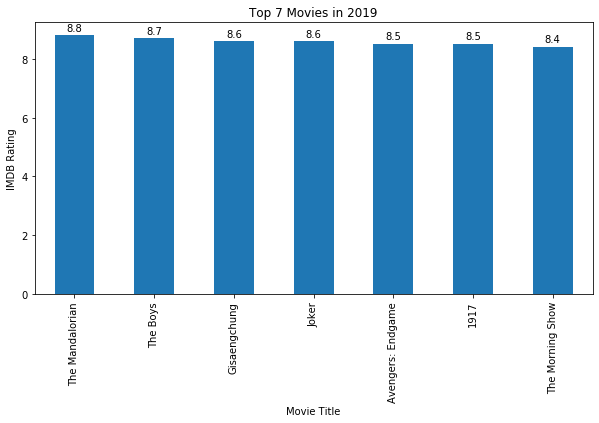

In [29]:
#Plotting :
plot7 = top7['Rating'].plot(kind = 'bar',\
                    figsize = (10,5))
plot7.set_title('Top 7 Movies in 2019')
plot7.set_ylabel('IMDB Rating')
plot7.set_xlabel('Movie Title')

spacing = 0
def add_value_labels(plot7, spacing):
# For each bar: Place a label
    for rect in plot7.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        plot7.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for positive and negative values.

# Call the function above.
add_value_labels(plot7,2.5)      